# Notebook

This notebook will track progress on my EngSci Thesis on Quantum Computing

# Resources

This section will contain some of most helpful resources, and will be continually updated.

- Qiskit documentation: https://qiskit.org/documentation/


# Project

In [1]:
import time
import math
import numpy as np
import matplotlib.pyplot as plt

import qiskit
from qiskit import IBMQ, Aer
qiAPItoken = 'ad123ba04aa1c06365cd1d08605c4bcd84ab305fbf7526a0e0bee1be35ea7aca9747c66b750745c94fbcfcd68a921271ff9c213a7ebd33988bece8e798a7a655'

#IBMQ.save_account(qiAPItoken)
#IBMQ.enable_account(qiAPItoken)

if False: #view qiskit version details
    #qiskit.__version__
    qiskit.__qiskit_version__

from qiskit import QuantumCircuit, execute, IBMQ
from qiskit.visualization import plot_histogram
from qiskit.providers import JobStatus #enum for status of jobs
import qiskit.tools.jupyter 

simulator = Aer.get_backend('qasm_simulator') # Use Aer's qasm_simulator
provider = IBMQ.load_account()
#IBMQ.providers()
backend = provider.get_backend(name='ibmq_16_melbourne')

### Qiskit Intro
The following is the first tutorial with qiskit,
available at: https://qiskit.org/documentation/getting_started.html


In [2]:




# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:", counts)

# Draw the circuit
circuit.draw()



Total count for 00 and 11 are: {'00': 523, '11': 477}


## Exponentiating Circuit Modulo N
Circuit shown in Figure 5 of Gamel & James (qubits labelled 0-7 from top)

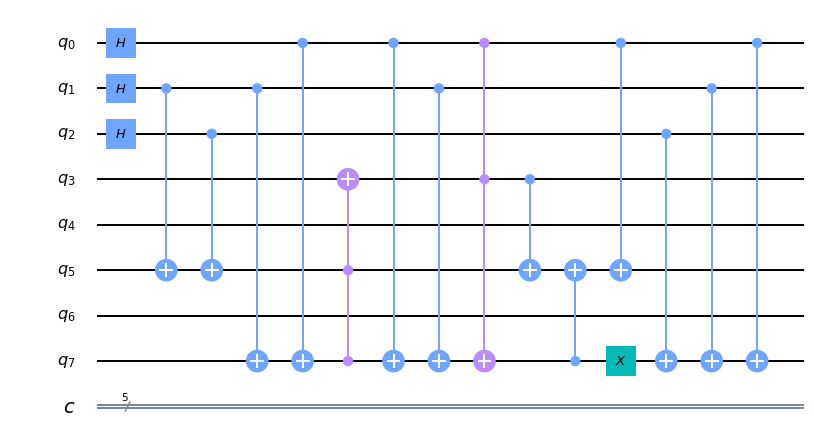

In [23]:
numQubits = 8
numBits = 5 #number of bits in output
circuit = QuantumCircuit(numQubits, numBits)

#for i in range(7):
#    circuit.reset(i)

#initialize 3 input qubits
circuit.h(2)
circuit.h(1)
circuit.h(0)

#Modular Exponentiation
circuit.cx(1, 5) #CNOT
circuit.cx(2, 5)
circuit.cx(1, 7)
circuit.cx(0, 7)
circuit.ccx(5, 7, 3) #Toffoli, target is last qubit
circuit.cx(0, 7)
circuit.cx(1, 7)
circuit.ccx(0, 3, 7)
circuit.cx(3, 5)
circuit.cx(7, 5)
circuit.cx(0, 5)
circuit.x(7) #NOT
circuit.cx(2, 7)
circuit.cx(1, 7)
circuit.cx(0, 7)

# Draw the circuit
circuit.draw(output='mpl')

#print(circuit.qasm())


In [4]:
##Running the above circuit on simulator
if False:
    #measure output
    circuit.barrier()
    circuit.measure([3,4,5,6,7], [4,3,2,1,0])

    # Execute the circuit on the qasm simulator
    job = execute(circuit, simulator, shots=1000)

    # Grab results from the job
    result = job.result()

    # Returns counts
    counts = result.get_counts(circuit)
    print("Total count is:", counts)
    print("Execution time:", result.time_taken)


    ##Results
    # input (x_3, x_2, x_1) : result (y_5 ... y_1)
    # 000 : 00001
    # 001 : 00100
    # 010 : 10000
    # 011 : 00001
    # 100 : 00100
    # 101 : 10000
    # 110 : 00001
    # 111 : 00100
    #all results (when run on simulator match truth table in paper)

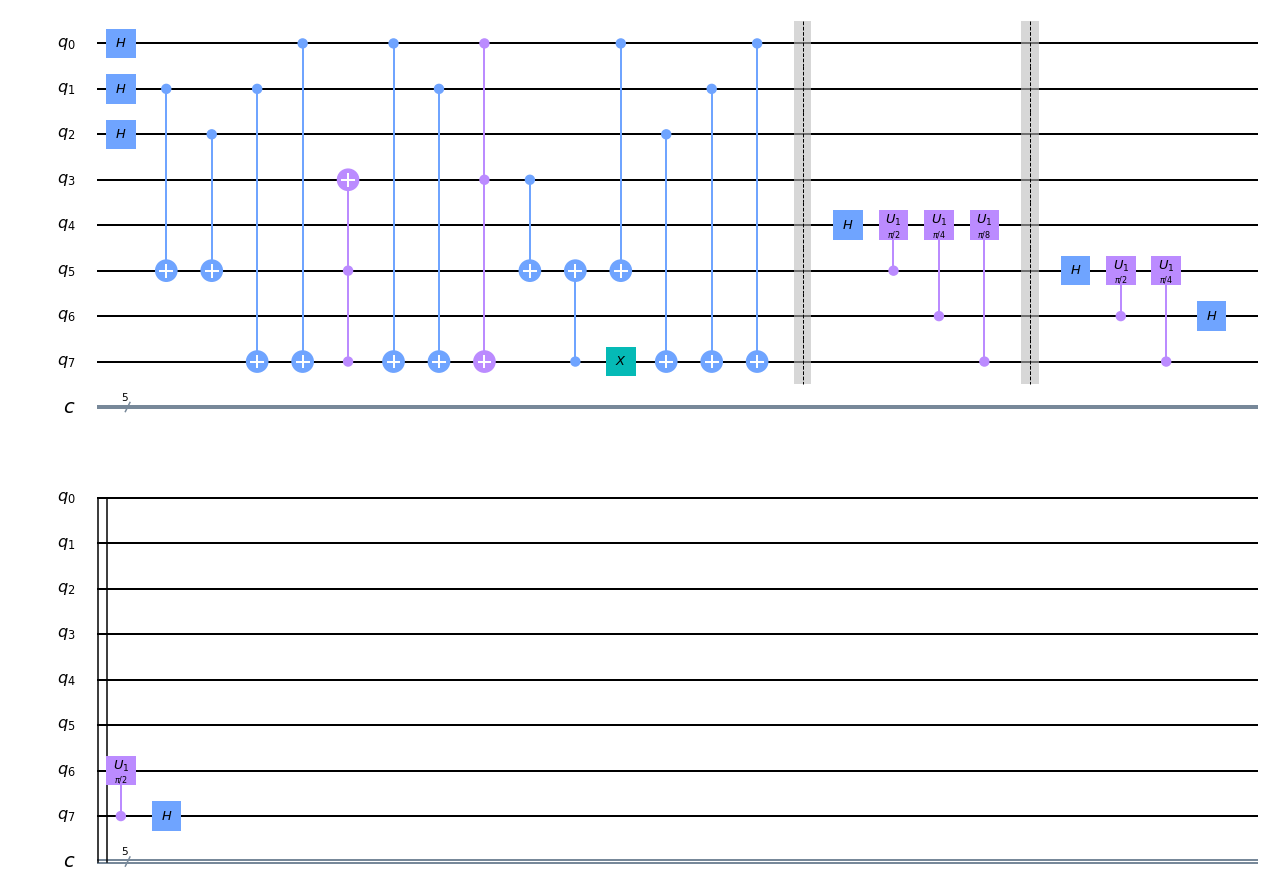

In [24]:
#Quantum Fourier Transform (QFT) 
#see https://community.qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html#circuit
circuit.barrier()
n
circuit.h(4)
circuit.cu1(math.pi/2.0, 5, 4) 
circuit.cu1(math.pi/4.0, 6, 4)
circuit.cu1(math.pi/8.0, 7, 4)
circuit.barrier()
circuit.h(5)
circuit.cu1(math.pi/2.0, 6, 5) 
circuit.cu1(math.pi/4.0, 7, 5)
circuit.h(6)
circuit.cu1(math.pi/2.0, 7, 6)
circuit.h(7)

circuit.draw(output='mpl')

Total count is: {'10010': 1551, '00000': 4836, '10000': 1581, '01011': 4647, '11000': 1519, '01110': 4704, '11010': 1610, '10111': 1550, '00111': 4643, '11111': 1571, '00011': 4689, '11001': 1533, '00001': 4838, '11100': 1494, '10110': 1571, '11101': 1635, '10100': 1503, '11110': 1609, '01101': 4716, '10001': 1561, '00110': 4699, '11011': 1575, '01111': 4749, '01100': 4618, '00010': 4749, '01001': 4675, '00100': 4731, '10101': 1522, '00101': 4591, '01000': 4644, '01010': 4591, '10011': 1495}
Execution time: 0.3193941116333008
[('00000', 4836), ('00001', 4838), ('00010', 4749), ('00011', 4689), ('00100', 4731), ('00101', 4591), ('00110', 4699), ('00111', 4643), ('01000', 4644), ('01001', 4675), ('01010', 4591), ('01011', 4647), ('01100', 4618), ('01101', 4716), ('01110', 4704), ('01111', 4749), ('10000', 1581), ('10001', 1561), ('10010', 1551), ('10011', 1495), ('10100', 1503), ('10101', 1522), ('10110', 1571), ('10111', 1550), ('11000', 1519), ('11001', 1533), ('11010', 1610), ('11011'

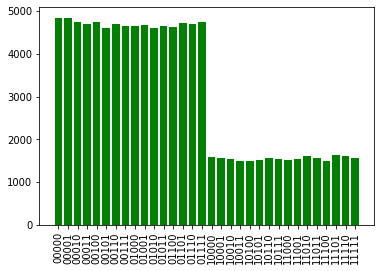

In [25]:
##Running the above circuit on simulator

#measure output
circuit.barrier()
circuit.measure([3,4,5,6,7], [4,3,2,1,0])

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=100000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("Total count is:", counts)
print("Execution time:", result.time_taken)
sortedCounts = sorted(counts.items())
print(sortedCounts)

plt.bar([sortedCounts[k][0] for k in range(len(sortedCounts))], [sortedCounts[k][1] for k in range(len(sortedCounts))], color='g')
#plt.bar([sortedCounts[k,0] for k in range(len(sortedCounts))], counts.values(), color='g')
_ = plt.xticks(rotation='vertical')

In [ ]:
##Running the above circuit on quantum backend
%qiskit_job_watcher
#qobj = compile(circuit, backend, shots=2000)
#job = backend.run(qobj)
job = execute(circuit, backend, shots=1000)
'''
start_time = time.time()
job_status = job.status()
while job_status not in JOB_FINAL_STATES:
    print(f'Status @ {time.time()-start_time:0.0f} s: {job_status.name},'
          f' est. queue position: {job.queue_position()}')
    time.sleep(10)
    job_status = job.status()

result = job.result()
print(result.get_counts())
'''

In [ ]:
print(job.status())
import matplotlib.pyplot as plt
if job.status() == JobStatus.DONE:
    result = job.result()
    
    counts = result.get_counts(circuit)
    print("Total count is:", counts)
    #print("Execution time:", result.time_taken)
    
    plt.bar(counts.keys(), counts.values(), color='g')

In [ ]:
print(result.time_taken)